Brenden Nelson

ID: 1000075551

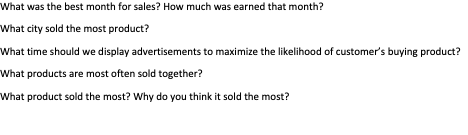

In [ ]:
# Data comes in with a single string in the Order Date column

import pandas as pd
import numpy as np

data = pd.read_csv('sales-data.csv', on_bad_lines='skip')
print(data.shape)
data['Quantity Ordered'] = data['Quantity Ordered'].astype('int64')
sales = data['Quantity Ordered'] * data['Price Each']
data['sales'] = sales
data

(185950, 9)


,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,sales
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90
1,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99
2,3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00
3,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99
4,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99
...,...,...,...,...,...,...,...,...,...,...
185945,186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,Los Angeles (CA),8.97
185946,186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,San Francisco (CA),700.00
185947,186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,San Francisco (CA),700.00
185948,186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,San Francisco (CA),379.99


In [ ]:
# Which month had the highest sales? How much was earned that month?

m = data.groupby('Month')['sales'].sum()
max_val = m.max()
max_key = m.idxmax()
print("Month #" + str(max_key) +  " had the most sales with a total sales value of $",max_val)

Month #12 had the most sales with a total sales value of $ 4613443.34


In [ ]:
# Which city sold the most products?

c = data.groupby('City')['Quantity Ordered'].sum()
print(c.idxmax(), max(c))

San Francisco  (CA) 50239


In [ ]:
# What time should we display advertisements to maximize the likelihood of a customer buying a product?

data['hour'] = pd.to_datetime(data['Order Date']).dt.hour
g = data.groupby('hour')['sales'].sum()

max_value = g.max()
max_key = g.idxmax()
print("We should display ads at hour " + str(max_key) + " to increase likelihood that customers make a purchase")
print("This hour had a total sales value of $" + str(max_value))

We should display ads at hour 19 to increase likelihood that customers make a purchase
This hour had a total sales value of $2412938.54


In [ ]:
# What products are most often sold together?

data = data[data['Order ID'].duplicated(keep=False)]

out = []
for i in data['Order ID'].unique():
  s=tuple(data['Product'][data['Order ID']==i])
  out.append(s)
out

In [ ]:
# This is my attempt at solving the problem above using pandas functions/methods rather than for loops


g = data.groupby('Order ID')['Product']
g

In [ ]:
data1 = pd.Series(out)
data1.value_counts().head()

(iPhone, Lightning Charging Cable)         882
(Google Phone, USB-C Charging Cable)       856
(iPhone, Wired Headphones)                 361
(Vareebadd Phone, USB-C Charging Cable)    312
(Google Phone, Wired Headphones)           303
dtype: int64